In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv('/content/house_price_regression_dataset.csv')

# Display basic information
print(df.head())
print(df.info())
print(df.describe())


   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null  

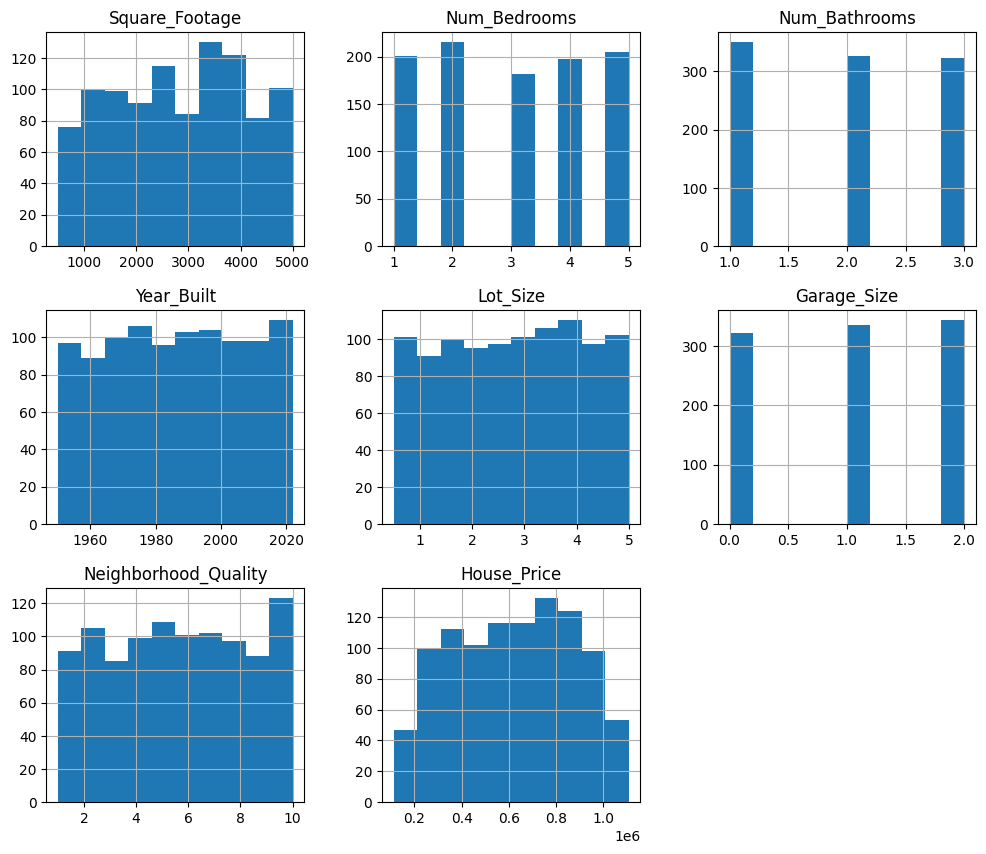

In [ ]:
# Distribution of each feature
df.hist(figsize=(12, 10))
plt.show()

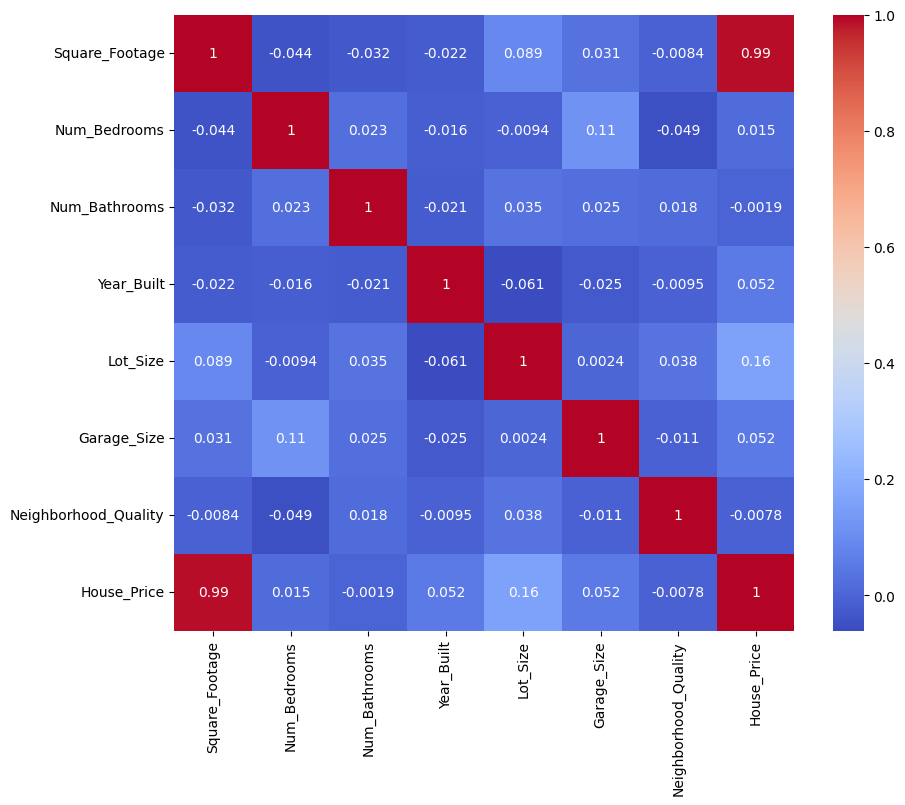

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

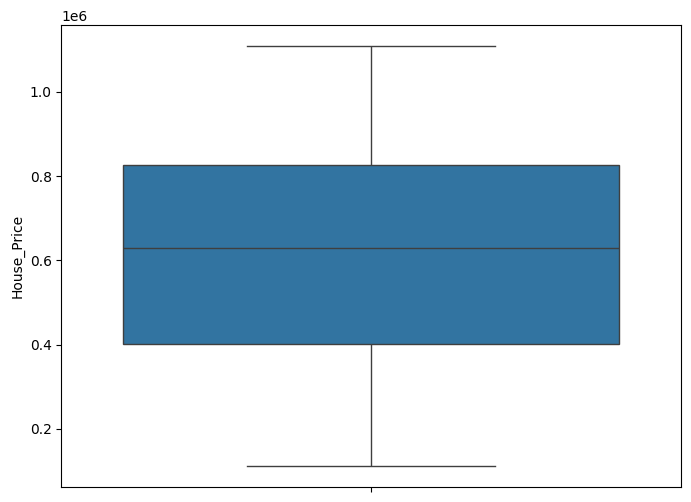

In [ ]:
# Boxplot for House Price
plt.figure(figsize=(8, 6))
sns.boxplot(df['House_Price'])
plt.show()

In [ ]:
print(df.isnull().sum())

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [ ]:
# Create new features
df['House_Age'] = 2024 - df['Year_Built']  # Assuming the current year is 2024

# Feature ratio example
df['Garage_Size_to_Sq_Footage'] = df['Garage_Size'] / df['Square_Footage']


In [ ]:
# Define features and target variable
X = df.drop('House_Price', axis=1)
y = df['House_Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


                            MSE        R2
Linear Regression  1.014095e+08  0.998427
Ridge Regression   1.014381e+08  0.998426
Lasso Regression   1.014347e+08  0.998426
Decision Tree      1.134779e+09  0.982395
Random Forest      4.043655e+08  0.993727
Gradient Boosting  2.212214e+08  0.996568


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model MSE: ", mean_squared_error(y_test, y_pred_best))
print("Best Model R2: ", r2_score(y_test, y_pred_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Model MSE:  398041261.3074962
Best Model R2:  0.993824878700919


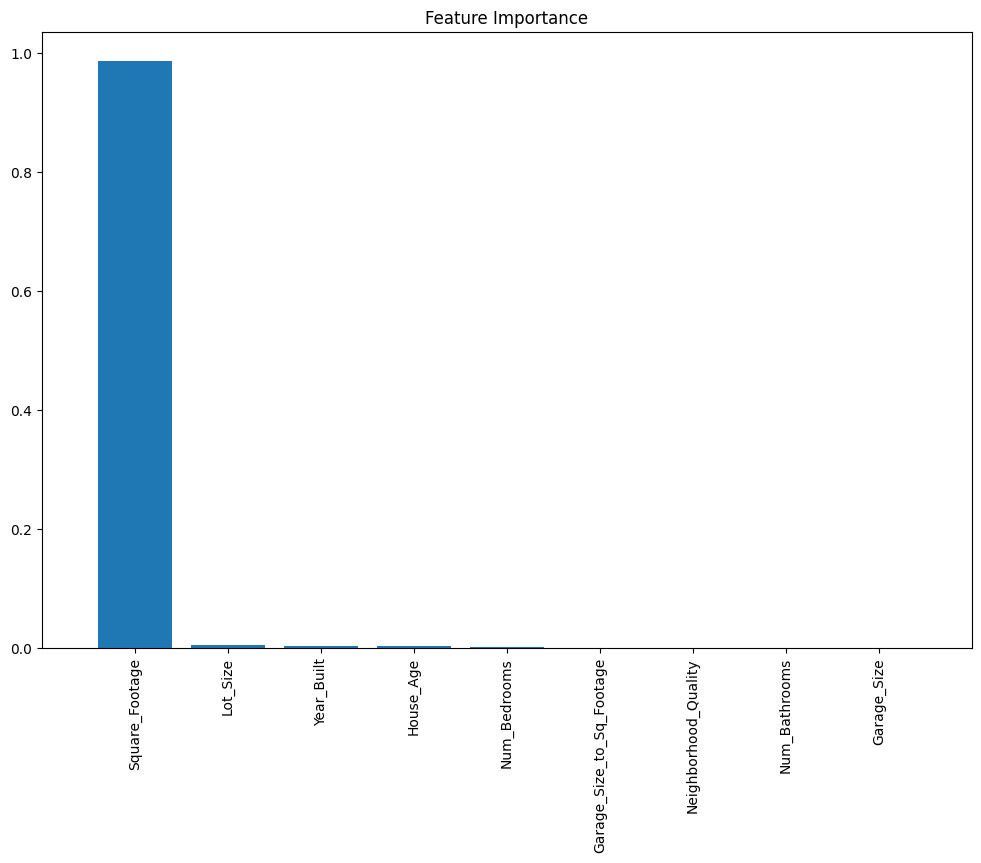

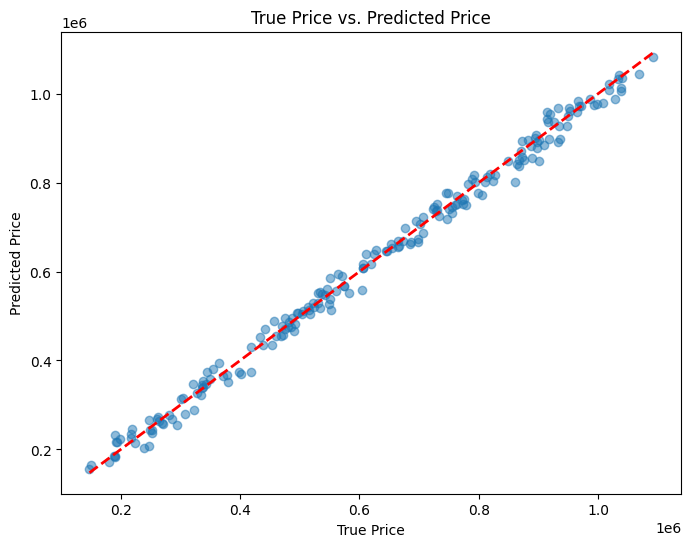

In [ ]:
# Feature importance for Random Forest
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True Price vs. Predicted Price')
plt.show()


In [ ]:
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_preds, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()
